In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


In [3]:
df = pd.read_csv("conversion_data.csv")

# 1. data overview

In [4]:
df.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


country
US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64


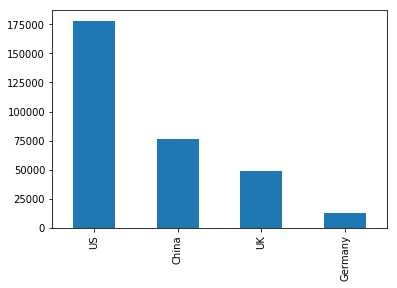

source
Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64


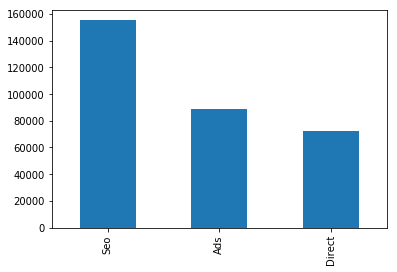

new_user
1    216744
0     99456
Name: new_user, dtype: int64


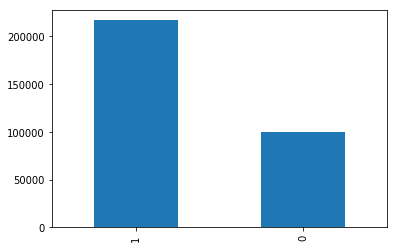

converted
0    306000
1     10200
Name: converted, dtype: int64


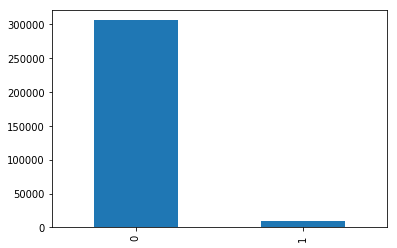

age


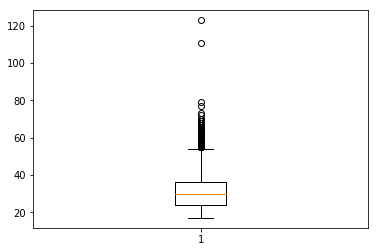

total_pages_visited


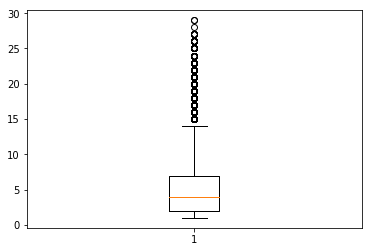

In [7]:
# visualize distribution of each column
cat_col = ['country', 'source']
num_col = ['age','total_pages_visited']
bin_col = ['new_user','converted']
for i in cat_col+bin_col:
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()
for i in num_col:
    print (i)
    plt.boxplot(df[i])
    plt.show()

intersting findings: 1) almost 1/3 returning users. 2) about 3% conversion rate - imbalanced class 3) some outliers in the numeric columns to be treated later

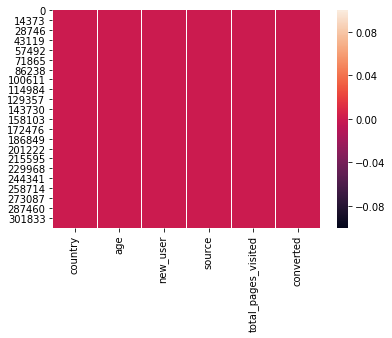

In [8]:
# check na values
sns.heatmap(df.isna())

I wish all datasets look like this 

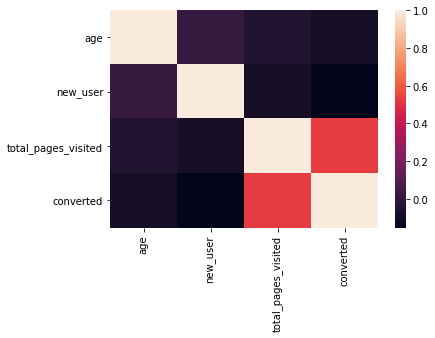

In [9]:
# check correlation
sns.heatmap(df.corr())

In [10]:
df.corr()['converted']

age                   -0.088797
new_user              -0.152374
total_pages_visited    0.528994
converted              1.000000
Name: converted, dtype: float64

total_pages_visited seems to be a good predictor when we single out each feature - makes sense.

# 2. Modelling
At this point, we can translate the business question into a classification problem.
I want to start with logistic regression, and then naive bayes, decision tree, random forest, and maybe SVM just for fun.
Before that, I need to remove outliers, OHE and scale the data.

In [11]:
# remove outliers based on the visuals
#df_o = df[(df['age']< 100) & (df['total_pages_visited']<df['total_pages_visited'].quantile(0.75)*1.5)]
df_o = df[(df['age']< 100)]

In [12]:
# one hot encoding
df_ohe = pd.get_dummies(df_o)

In [13]:
# prepare train, test and scale the data
y = df_ohe['converted']
X = df_ohe.drop('converted', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
logreg = LogisticRegressionCV(scoring = 'f1')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))

precision:  0.8649725959143
recall:  0.6757493188010899


In [31]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))

precision:  0.8279940857565303
recall:  0.6539509536784741


In [17]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))

precision:  0.48420818505338076
recall:  0.8474114441416893


In [23]:
svc = LinearSVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))

precision:  0.8738366080661841
recall:  0.6578435188789412


We can spend more time in tweaking our model or trying new features, but we can go with Logistic Regression for now for its interpretability, decent performance and efficiency. Using this model, we can predict the conversion rate on the test population:

In [19]:
y_pred = rfc.predict(X_test_scaled)
print ("the predicted conversion rate is", y_pred.mean())
print ("the actual conversion rate is", y_test.mean())

the predicted conversion rate is 0.02570524984187223
the actual conversion rate is 0.03249841872232764


Next, we can take a closer look at the factors of conversion rate and how the model weighs them:

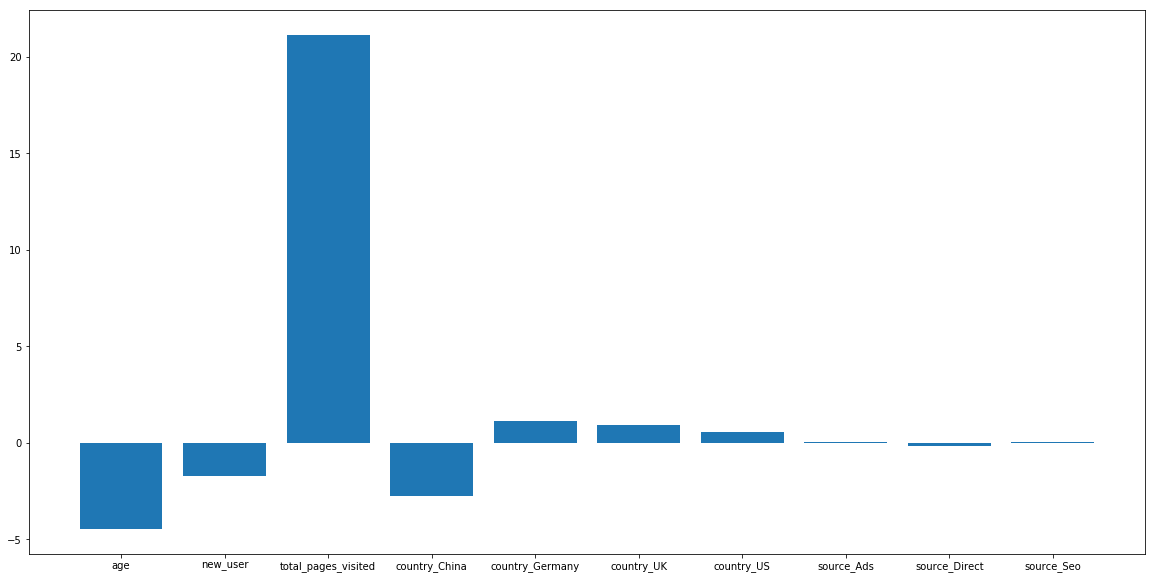

In [20]:
coef = logreg.coef_[0]
plt.figure(figsize=(20,10))
plt.bar(X.columns,coef)
plt.show()

In [ ]:
x

precision:  0.8738366080661841
recall:  0.6578435188789412


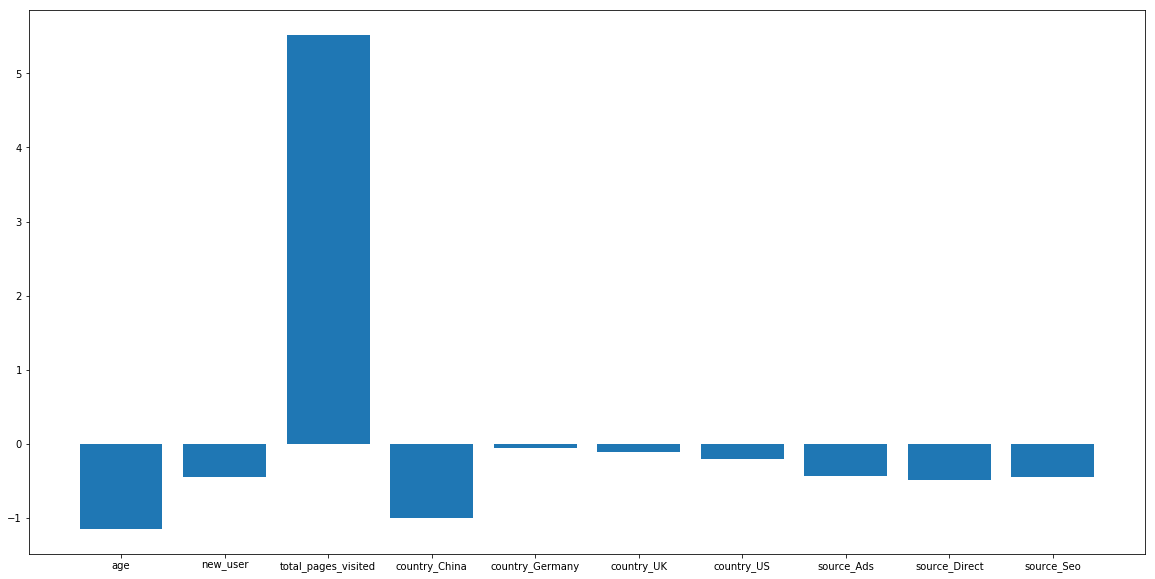

In [68]:
svc = LinearSVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))

coef = svc.coef_[0]
plt.figure(figsize=(20,10))
plt.bar(X.columns,coef)
plt.show()

The more total pages visited, the more likely this person would convert.
People from Germany, UK, and US are more likely to convert. Interestingly, while Germans are represented the least in raw counts, they're more likely to convert than the other countries, indicating a huge business opportunity in Germany.
Age, new_user, country_China, source_Direct have a negative correlation with conversion.

From this chart, we can see total_pages_visited is the most impactful factor. However, we probably won't have this data at deployment if we want to do real-time prediction. Next I'll remove this feature in the training and testing set.


In [39]:
X_train_new = np.delete(X_train_scaled,2,1)
X_test_new = np.delete(X_test_scaled,2,1)

precision:  0.09276184473158945
recall:  0.6874270144024912
acc:  0.7713472485768501


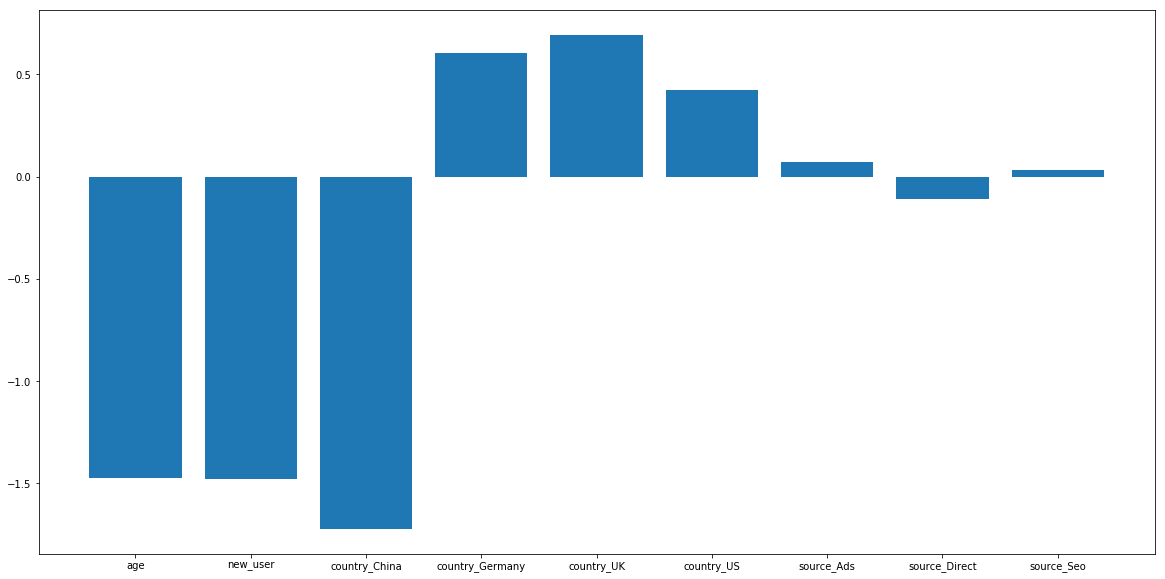

In [66]:
logreg = LogisticRegressionCV(scoring = 'f1', class_weight ='balanced')
logreg.fit(X_train_new, y_train)
y_pred = logreg.predict(X_test_new)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print ("acc: ", accuracy_score(y_test,y_pred))

coef = logreg.coef_[0]
plt.figure(figsize=(20,10))
plt.bar(X.columns.drop('total_pages_visited'),coef)
plt.show()

We can see the coefficent changes a bit: China becomes the biggest indictor, age and new_user have similar negative effect. UK, Germnay, US remain positive. Source seems to play a bigger factor. This indicates there is a huge potential in improving the experience for Chinese visitors.
It would be interesting to see interactions among these indicators, for example, examine on why Germany becomes less impactful when total_pages_visited is removed. 

precision:  0.8738366080661841
recall:  0.6578435188789412


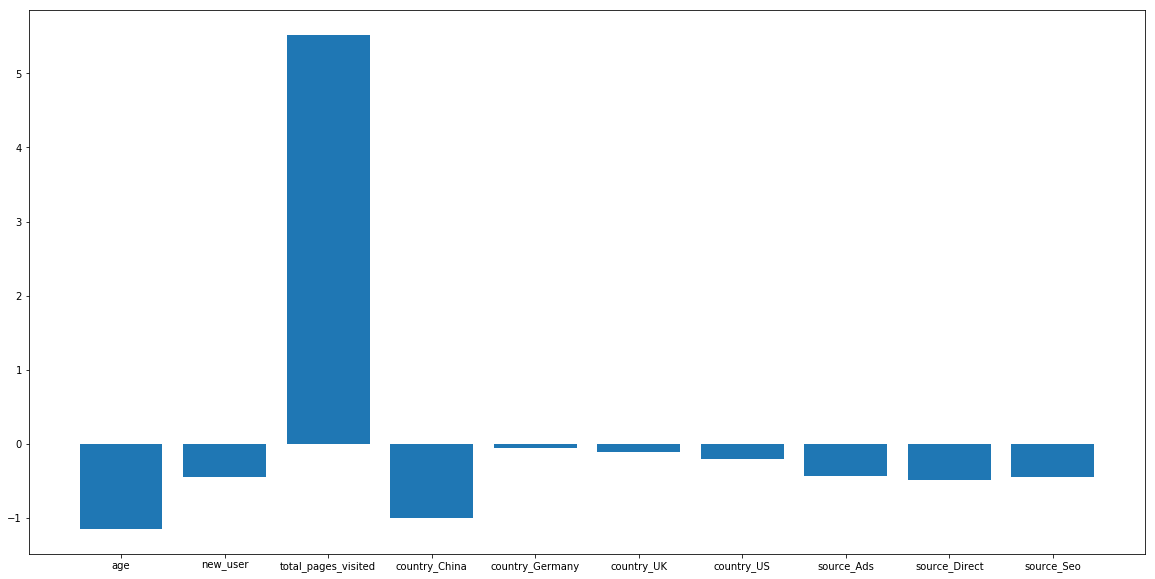

In [70]:
#check SVC coefficients for fun - results are quite similar
svc = LinearSVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))

coef = svc.coef_[0]
plt.figure(figsize=(20,10))
plt.bar(X.columns,coef)
plt.show()

precision:  0.08852551451931209
recall:  0.7333592837680031


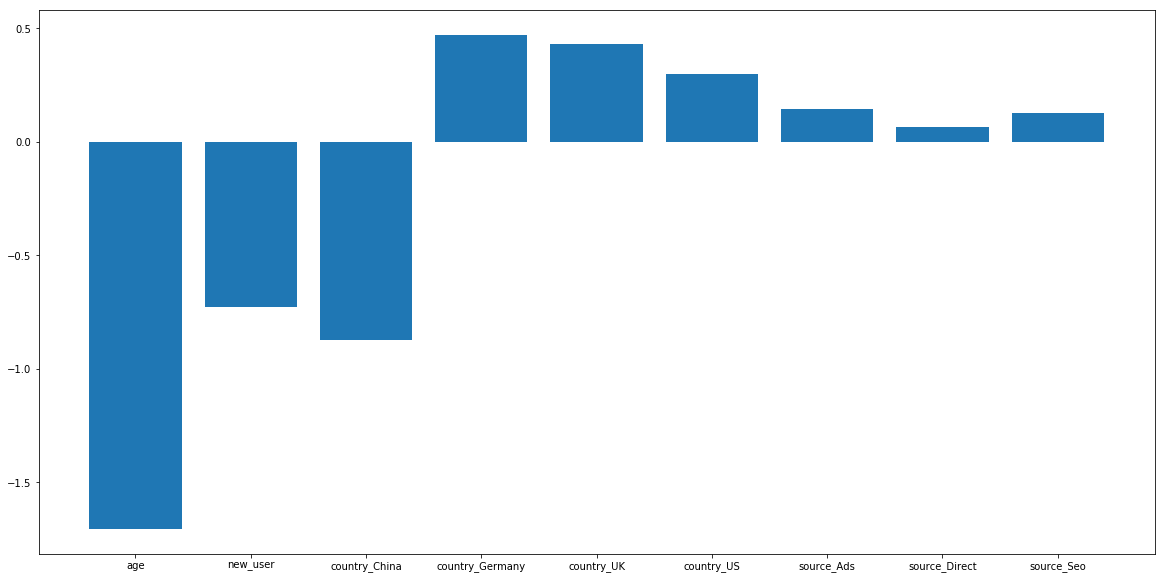

In [71]:
svc = LinearSVC(class_weight = 'balanced')
svc.fit(X_train_new, y_train)
y_pred = svc.predict(X_test_new)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))

coef = svc.coef_[0]
plt.figure(figsize=(20,10))
plt.bar(X.columns.drop('total_pages_visited'),coef)
plt.show()

# 4. Business Insights and Next steps

1. Encourage total pages visited by improving site experience through further analysis on consumer browsing behavior.

2. Adjust marketing budget so more can be invested in retaining old customers, reaching young audience or German audiance.

3. Investigate the site in China to find the root cause for the low performance. 

4. Add interaction features to examine the relationship among features.
